### Task 1. Application of Maximum Flow Algorithm for Goods Logistics

Develop a program for modeling a flow network for goods logistics from warehouses to stores using the maximum flow algorithm. Analyze the obtained results and compare them with theoretical knowledge.

#### Task Description

Build a graph model representing the flow network as shown in the following image:

Connections and capacities in the graph are as follows:

| From        | To          | Capacity (units) |
|-------------|-------------|------------------|
| Terminal 1  | Warehouse 1 | 25               |
| Terminal 1  | Warehouse 2 | 20               |
| Terminal 1  | Warehouse 3 | 15               |
| Terminal 2  | Warehouse 3 | 15               |
| Terminal 2  | Warehouse 4 | 30               |
| Terminal 2  | Warehouse 2 | 10               |
| Warehouse 1 | Store 1     | 15               |
| Warehouse 1 | Store 2     | 10               |
| Warehouse 1 | Store 3     | 20               |
| Warehouse 2 | Store 4     | 15               |
| Warehouse 2 | Store 5     | 10               |
| Warehouse 2 | Store 6     | 25               |
| Warehouse 3 | Store 7     | 20               |
| Warehouse 3 | Store 8     | 15               |
| Warehouse 3 | Store 9     | 10               |
| Warehouse 4 | Store 10    | 20               |
| Warehouse 4 | Store 11    | 10               |
| Warehouse 4 | Store 12    | 15               |
| Warehouse 4 | Store 13    | 5                |
| Warehouse 4 | Store 14    | 10               |

Apply the maximum flow algorithm to solve the problem. Write a program that implements the Edmonds-Karp algorithm, or use an already implemented version to find the maximum flow in the constructed graph. Analyze the obtained result. Has the optimal flow been achieved, and what does this mean for the considered network?

Prepare a report with calculations and explanations. Explain which vertices and edges were chosen, how they correspond to real elements of the logistics system. Show step-by-step calculation of the maximum flow and explain the logic of each step.

#### Technical Requirements

1. Use the Edmonds-Karp algorithm for implementing maximum flow.

2. Graph construction must match the given structure with 20 vertices and specified capacities.

#### Requirements

1. The program correctly performs the maximum flow calculation and returns accurate results.

2. Data is correctly added to the graph and matches the given logistics network structure.

3. Explanations and analysis are clear and clearly reflect the algorithm's logic.

4. The report includes analysis of the obtained results.

#### After obtaining the table, answer the following questions:

1. Which terminals provide the largest flow of goods to stores?

2. Which routes have the smallest capacity and how does this affect the total flow?

3. Which stores received the least goods and can their supply be increased by increasing the capacity of certain routes?

4. Are there bottlenecks that can be eliminated to improve the efficiency of the logistics network?

In [2]:
!pip install networkx matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 799.2 kB/s eta 0:00:02
   ------------------ --------------------- 0.8/1.7 MB 819.2 kB/s eta 0:00:02
   ------------------ --------------------- 0.8/1.7 MB 819.2 kB/s eta 0:00:02
   ------------------------ --------------- 1.0/1.7 MB 786.4 kB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 799.2 kB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 799.2 kB/s eta 0:00:01
   ------------------------------------ --- 1.6/1.7 MB 791.5 kB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 779.3 kB/s eta 0:00:00
   ---------------------------------

Edge from 0 to 2 with capacity 25
Edge from 0 to 3 with capacity 20
Edge from 0 to 4 with capacity 15
Edge from 1 to 4 with capacity 15
Edge from 1 to 5 with capacity 30
Edge from 1 to 3 with capacity 10
Edge from 2 to 6 with capacity 15
Edge from 2 to 7 with capacity 10
Edge from 2 to 8 with capacity 20
Edge from 3 to 9 with capacity 15
Edge from 3 to 10 with capacity 10
Edge from 3 to 11 with capacity 25
Edge from 4 to 12 with capacity 20
Edge from 4 to 13 with capacity 15
Edge from 4 to 14 with capacity 10
Edge from 5 to 15 with capacity 20
Edge from 5 to 16 with capacity 10
Edge from 5 to 17 with capacity 15
Edge from 5 to 18 with capacity 5
Edge from 5 to 19 with capacity 10
Node 0 position: (0.2, 1.0)
Node 1 position: (0.8, 1.0)
Node 2 position: (0.1, 0.6)
Node 3 position: (0.3, 0.6)
Node 4 position: (0.55, 0.6)
Node 5 position: (0.85, 0.6)
Node 6 position: (0.0, 0.2)
Node 7 position: (0.075, 0.2)
Node 8 position: (0.15, 0.2)
Node 9 position: (0.225, 0.2)
Node 10 position: (0.3, 

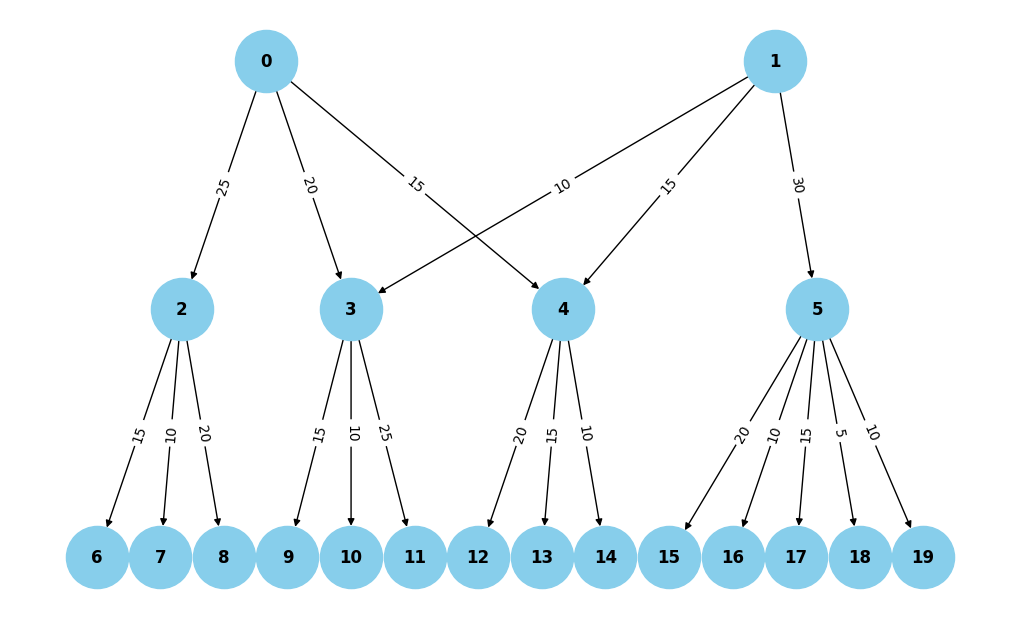

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Створюємо граф
G = nx.DiGraph()

# Додаємо ребра з пропускною здатністю

# Node mapping:
# Terminals: 0-1
# Warehouses: 2-5
# Stores: 6-19

edges = [
    # Terminal 1 connections
    (0, 2, 25),  # Terminal 1 -> Warehouse 1
    (0, 3, 20),  # Terminal 1 -> Warehouse 2
    (0, 4, 15),  # Terminal 1 -> Warehouse 3
    
    # Terminal 2 connections
    (1, 4, 15),  # Terminal 2 -> Warehouse 3
    (1, 5, 30),  # Terminal 2 -> Warehouse 4
    (1, 3, 10),  # Terminal 2 -> Warehouse 2
    
    # Warehouse 1 connections
    (2, 6, 15),  # Warehouse 1 -> Store 1
    (2, 7, 10),  # Warehouse 1 -> Store 2
    (2, 8, 20),  # Warehouse 1 -> Store 3
    
    # Warehouse 2 connections
    (3, 9, 15),  # Warehouse 2 -> Store 4
    (3, 10, 10), # Warehouse 2 -> Store 5
    (3, 11, 25), # Warehouse 2 -> Store 6
    
    # Warehouse 3 connections
    (4, 12, 20), # Warehouse 3 -> Store 7
    (4, 13, 15), # Warehouse 3 -> Store 8
    (4, 14, 10), # Warehouse 3 -> Store 9
    
    # Warehouse 4 connections
    (5, 15, 20), # Warehouse 4 -> Store 10
    (5, 16, 10), # Warehouse 4 -> Store 11
    (5, 17, 15), # Warehouse 4 -> Store 12
    (5, 18, 5),  # Warehouse 4 -> Store 13
    (5, 19, 10)  # Warehouse 4 -> Store 14
]

# Print edges for verification
for edge in edges:
    print(f"Edge from {edge[0]} to {edge[1]} with capacity {edge[2]}")

# Додаємо всі ребра до графа
G.add_weighted_edges_from(edges)

# Create position dictionary for hierarchical layout,
pos = {}

# Terminals at the top (level 0),
pos[0] = (0.2, 1.0)  # Terminal 1,
pos[1] = (0.8, 1.0)  # Terminal 2,

# Warehouses in the middle (level 1),
pos[2]  = (0.1,  0.6)  # Warehouse 1,
pos[3]  = (0.3,  0.6)  # Warehouse 2,
pos[4]  = (0.55, 0.6)  # Warehouse 3,
pos[5]  = (0.85, 0.6)  # Warehouse 4,

# Stores at the bottom (level 2),
# Stores connected to Warehouse 1,
pos[6]  = (0.0,   0.2)  # Store 1,
pos[7]  = (0.075, 0.2)  # Store 2,
pos[8]  = (0.15,  0.2)  # Store 3,

# Stores connected to Warehouse 2,
pos[9]  = (0.225, 0.2)  # Store 4,
pos[10] = (0.3,   0.2)  # Store 5,
pos[11] = (0.375, 0.2)  # Store 6,

# Stores connected to Warehouse 3,
pos[12] = (0.45,  0.2)  # Store 7,
pos[13] = (0.525, 0.2)  # Store 8,
pos[14] = (0.6,   0.2)  # Store 9,

# Stores connected to Warehouse 4,
pos[15] = (0.675, 0.2) # Store 10,
pos[16] = (0.75,  0.2) # Store 11,
pos[17] = (0.825, 0.2) # Store 12,
pos[18] = (0.9,   0.2) # Store 13,
pos[19] = (0.975, 0.2) # Store 14,


# Print positions for verification,
for node, position in pos.items():
    print(f"Node {node} position: {position}")

# Малюємо граф
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=12, font_weight="bold", arrows=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Відображаємо граф
plt.show()


In [11]:
# Create capacity matrix (20x20)
capacity_matrix = [[0] * 20 for _ in range(20)]

# Terminal 1 connections
capacity_matrix[0][2] = 25  # Terminal 1 -> Warehouse 1
capacity_matrix[0][3] = 20  # Terminal 1 -> Warehouse 2
capacity_matrix[0][4] = 15  # Terminal 1 -> Warehouse 3

# Terminal 2 connections
capacity_matrix[1][4] = 15  # Terminal 2 -> Warehouse 3
capacity_matrix[1][5] = 30  # Terminal 2 -> Warehouse 4
capacity_matrix[1][3] = 10  # Terminal 2 -> Warehouse 2

# Warehouse 1 connections
capacity_matrix[2][6] = 15  # Warehouse 1 -> Store 1
capacity_matrix[2][7] = 10  # Warehouse 1 -> Store 2
capacity_matrix[2][8] = 20  # Warehouse 1 -> Store 3

# Warehouse 2 connections
capacity_matrix[3][9] = 15  # Warehouse 2 -> Store 4
capacity_matrix[3][10] = 10  # Warehouse 2 -> Store 5
capacity_matrix[3][11] = 25  # Warehouse 2 -> Store 6

# Warehouse 3 connections
capacity_matrix[4][12] = 20  # Warehouse 3 -> Store 7
capacity_matrix[4][13] = 15  # Warehouse 3 -> Store 8
capacity_matrix[4][14] = 10  # Warehouse 3 -> Store 9

# Warehouse 4 connections
capacity_matrix[5][15] = 20  # Warehouse 4 -> Store 10
capacity_matrix[5][16] = 10  # Warehouse 4 -> Store 11
capacity_matrix[5][17] = 15  # Warehouse 4 -> Store 12
capacity_matrix[5][18] = 5   # Warehouse 4 -> Store 13
capacity_matrix[5][19] = 10  # Warehouse 4 -> Store 14

# Print capacity matrix in a readable format
def print_matrix(matrix):
    print("Capacity Matrix:")
    print("     ", end="")
    for i in range(20):
        print(f"{i:3d} ", end="")
    print("\n")
    
    for i in range(20):
        print(f"{i:3d}  ", end="")
        for j in range(20):
            print(f"{matrix[i][j]:3d} ", end="")
        print()

print_matrix(capacity_matrix)

Capacity Matrix:
       0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19 

  0    0   0  25  20  15   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  1    0   0   0  10  15  30   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  2    0   0   0   0   0   0  15  10  20   0   0   0   0   0   0   0   0   0   0   0 
  3    0   0   0   0   0   0   0   0   0  15  10  25   0   0   0   0   0   0   0   0 
  4    0   0   0   0   0   0   0   0   0   0   0   0  20  15  10   0   0   0   0   0 
  5    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  20  10  15   5  10 
  6    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  7    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  8    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  9    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 10    0   0   0   0   0   0   0   0

In [31]:
# Create dictionary mapping paths to capacities
path_capacities = {}

# Helper function to get node name
def get_node_name(node_id):
    if node_id < 2:
        return f'Terminal {node_id + 1}'
    elif node_id < 6:
        return f'Warehouse {node_id - 1}'
    else:
        return f'Store {node_id - 5}'

# Create dictionary entries for non-zero capacities
for i in range(20):
    for j in range(20):
        if capacity_matrix[i][j] > 0:
            path = f"{get_node_name(i)} -> {get_node_name(j)}"
            path_capacities[path] = capacity_matrix[i][j]

# Print the dictionary
print("Path                      Capacities:")
print("-" * 50)
for path, capacity in path_capacities.items():
    print(f"{path:<30} {capacity}")

Path                      Capacities:
--------------------------------------------------
Terminal 1 -> Warehouse 1      25
Terminal 1 -> Warehouse 2      20
Terminal 1 -> Warehouse 3      15
Terminal 2 -> Warehouse 2      10
Terminal 2 -> Warehouse 3      15
Terminal 2 -> Warehouse 4      30
Warehouse 1 -> Store 1         15
Warehouse 1 -> Store 2         10
Warehouse 1 -> Store 3         20
Warehouse 2 -> Store 4         15
Warehouse 2 -> Store 5         10
Warehouse 2 -> Store 6         25
Warehouse 3 -> Store 7         20
Warehouse 3 -> Store 8         15
Warehouse 3 -> Store 9         10
Warehouse 4 -> Store 10        20
Warehouse 4 -> Store 11        10
Warehouse 4 -> Store 12        15
Warehouse 4 -> Store 13        5
Warehouse 4 -> Store 14        10


In [21]:
from collections import deque

# Функція для пошуку збільшуючого шляху (BFS)
def bfs(capacity_matrix, flow_matrix, source, sink, parent):
    visited = [False] * len(capacity_matrix)
    queue = deque([source])
    visited[source] = True

    while queue:
        current_node = queue.popleft()
        
        for neighbor in range(len(capacity_matrix)):
            # Перевірка, чи є залишкова пропускна здатність у каналі
            if not visited[neighbor] and capacity_matrix[current_node][neighbor] - flow_matrix[current_node][neighbor] > 0:
                parent[neighbor] = current_node
                visited[neighbor] = True
                if neighbor == sink:
                    return True
                queue.append(neighbor)
    
    return False

# Основна функція для обчислення максимального потоку
def edmonds_karp(capacity_matrix, source, sink):
    num_nodes = len(capacity_matrix)
    flow_matrix = [[0] * num_nodes for _ in range(num_nodes)]  # Ініціалізуємо матрицю потоку нулем
    parent = [-1] * num_nodes
    max_flow = 0

    # Поки є збільшуючий шлях, додаємо потік
    while bfs(capacity_matrix, flow_matrix, source, sink, parent):
        # Знаходимо мінімальну пропускну здатність уздовж знайденого шляху (вузьке місце)
        path_flow = float('Inf')
        current_node = sink

        while current_node != source:
            previous_node = parent[current_node]
            path_flow = min(path_flow, capacity_matrix[previous_node][current_node] - flow_matrix[previous_node][current_node])
            current_node = previous_node
        
        # Оновлюємо потік уздовж шляху, враховуючи зворотний потік
        current_node = sink
        while current_node != source:
            previous_node = parent[current_node]
            flow_matrix[previous_node][current_node] += path_flow
            flow_matrix[current_node][previous_node] -= path_flow
            current_node = previous_node
        
        # Збільшуємо максимальний потік
        max_flow += path_flow

    return max_flow

In [25]:
!pip install pandas


In [28]:
import pandas as pd

# Create results list
results = []

# Run max flow for each terminal-store combination
for terminal in range(2):  # Terminals 0 and 1
    for store in range(6, 20):  # Stores 6-19
        max_flow = edmonds_karp(capacity_matrix, terminal, store)
        results.append({
            'Terminal': f'Terminal {terminal + 1}',
            'Store': f'Store {store - 5}',
            'Real flow': max_flow
        })

# Create DataFrame and display results
df = pd.DataFrame(results)
print("Maximum Flow Results:")
print(df.to_string(index=False))

Maximum Flow Results:
  Terminal    Store  Real flow
Terminal 1  Store 1         15
Terminal 1  Store 2         10
Terminal 1  Store 3         20
Terminal 1  Store 4         15
Terminal 1  Store 5         10
Terminal 1  Store 6         20
Terminal 1  Store 7         15
Terminal 1  Store 8         15
Terminal 1  Store 9         10
Terminal 1 Store 10          0
Terminal 1 Store 11          0
Terminal 1 Store 12          0
Terminal 1 Store 13          0
Terminal 1 Store 14          0
Terminal 2  Store 1          0
Terminal 2  Store 2          0
Terminal 2  Store 3          0
Terminal 2  Store 4         10
Terminal 2  Store 5         10
Terminal 2  Store 6         10
Terminal 2  Store 7         15
Terminal 2  Store 8         15
Terminal 2  Store 9         10
Terminal 2 Store 10         20
Terminal 2 Store 11         10
Terminal 2 Store 12         15
Terminal 2 Store 13          5
Terminal 2 Store 14         10


### Unswers

#### 1. Which terminals provide the largest flow of goods to stores?

In [29]:
print(f'Total flow in Terminal 1: {df[df["Terminal"] == "Terminal 1"]["Real flow"].sum()}')
print(f'Total flow in Terminal 2: {df[df["Terminal"] == "Terminal 2"]["Real flow"].sum()}')


Total flow in Terminal 1: 130
Total flow in Terminal 2: 130


Both terminals provide the same overall flow to stores.

#### 2. Which routes have the smallest capacity and how does this affect the total flow?

In [32]:
print("Path                      Capacities:")
print("-" * 50)
for path, capacity in path_capacities.items():
    if capacity <= 10:
        print(f"{path:<30} {capacity}")

Path                      Capacities:
--------------------------------------------------
Terminal 2 -> Warehouse 2      10
Warehouse 1 -> Store 2         10
Warehouse 2 -> Store 5         10
Warehouse 3 -> Store 9         10
Warehouse 4 -> Store 11        10
Warehouse 4 -> Store 13        5
Warehouse 4 -> Store 14        10


As we can see the minimum capacity of connection between 2 nodes limits the overal flow of this route.

#### 3. Which stores received the least goods and can their supply be increased by increasing the capacity of certain routes?

In [36]:
non_zero_flow = df[df["Real flow"] != 0]
print(f'Stores with the least flow: {non_zero_flow[non_zero_flow["Real flow"] <= 10 ]}')

# Stores 13 and 14 received the least goods. Their supply can be increased by increasing the capacity of the following routes:
# - Terminal 1 -> Warehouse 2 -> Store 14
# - Terminal 1 -> Warehouse 2 -> Store 14
# - Terminal 1 -> Warehouse 2 -> Store 14
# - Terminal 1 -> Warehouse 2 -> Store 14


Stores with the least flow:       Terminal     Store  Real flow
1   Terminal 1   Store 2         10
4   Terminal 1   Store 5         10
8   Terminal 1   Store 9         10
17  Terminal 2   Store 4         10
18  Terminal 2   Store 5         10
19  Terminal 2   Store 6         10
22  Terminal 2   Store 9         10
24  Terminal 2  Store 11         10
26  Terminal 2  Store 13          5
27  Terminal 2  Store 14         10


As we can see a lot of stores have weak routes and suffer with small amount of goods. In most cases the worst capability has the "lates kilometer", but in case for example path Terminal2 - Warehouse2 - will be the weakest path in case the most Warehouse-Store pathes will be fixed.

#### 4. Are there bottlenecks that can be eliminated to improve the efficiency of the logistics network?

Yes, the weakest path is Terminal2 - Store13 (5), and the reason is the "latest kilometer", so this part has to be fixed with the highest priority.